<a href="https://colab.research.google.com/github/Azhari-Bar/Praktikum1_Aplikasi_Berbasis_Platfrom/blob/main/STRATEGI_ALGORITMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ikbar Kazfi Azhari
Nim : 2211102283

In [ ]:
#Install library OSMnx
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
import osmnx
print(osmnx.__version__)


2.0.1


In [ ]:
#Import Library
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt


In [ ]:
Kabupaten = ox.geocode_to_gdf("Banyumas, Java, Indonesia")
Kabupaten.head()


,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((108.89131 -7.44891, 108.89136 -7.449...",108.891311,-7.663945,109.445834,-7.246292,27008493,relation,9686820,-7.455072,109.116746,boundary,administrative,12,0.479602,county,Banyumas,"Banyumas, Central Java, Java, Indonesia"


In [ ]:
#Mengetahui CRS data
Kabupaten.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

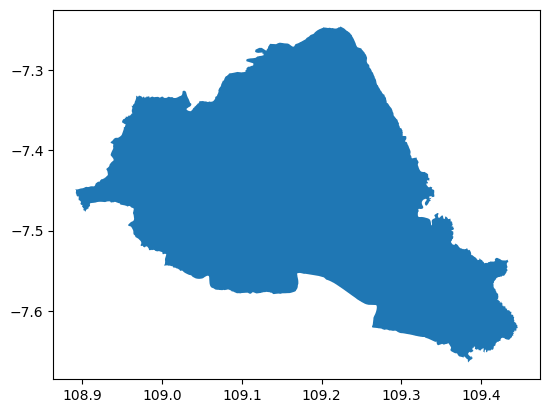

In [ ]:
Kabupaten.plot()

In [ ]:
#mencari dan mendapatkan beberapa tempat sekaligus
List_Kab = [
  "Banyumas, Central Java, Indonesia",
  "Purbalingga, Central Java, Indonesia",
  "Cilacap, Central Java, Indonesia"
]

In [ ]:
Beberapa_Kabupaten = ox.geocode_to_gdf(List_Kab)
Beberapa_Kabupaten.head()

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((108.89131 -7.44891, 108.89136 -7.449...",108.891311,-7.663945,109.445834,-7.246292,27008493,relation,9686820,-7.455072,109.116746,boundary,administrative,12,0.479602,county,Banyumas,"Banyumas, Central Java, Java, Indonesia"
1,"POLYGON ((109.22367 -7.24629, 109.22459 -7.246...",109.223671,-7.493500,109.584518,-7.161180,27043148,relation,9686819,-7.327330,109.399899,boundary,administrative,12,0.452167,county,Purbalingga,"Purbalingga, Central Java, Java, Indonesia"
2,"POLYGON ((108.55585 -7.28859, 108.55614 -7.289...",108.555855,-7.784624,109.395500,-7.138725,26937906,relation,9686822,-7.461671,108.804615,boundary,administrative,12,0.478568,county,Cilacap,"Cilacap, Central Java, Java, Indonesia"


<Axes: >

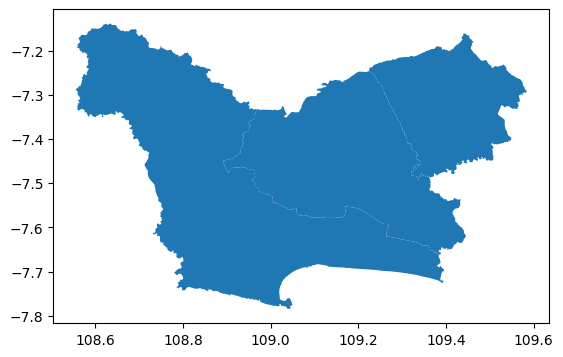

In [ ]:
Beberapa_Kabupaten.plot()

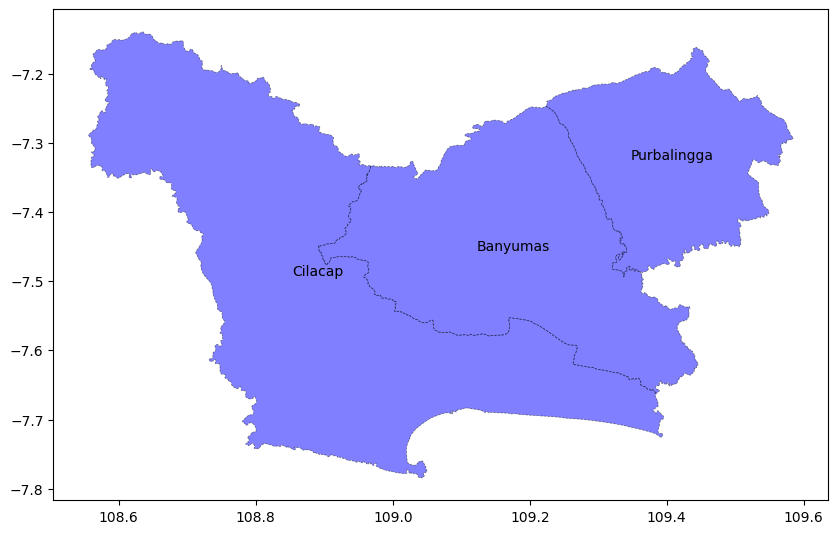

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
Beberapa_Kabupaten.plot(ax=ax, color='blue', alpha=0.5, linestyle='--', linewidth=0.5, edgecolor='black')

for idx, row in Beberapa_Kabupaten.iterrows():
  ax.annotate(text=row['name'], xy=row.geometry.centroid.coords[0], ha='center', fontsize=10, color='black')

plt.show()

In [ ]:
place_name = "Banyumas, Indonesia"

#contoh mencari dan mendapatkan data sekolah
tag_amenity = {'amenity' : 'school'}
sekolah = ox.features_from_place(place_name, tag_amenity)
sekolah.shape

(173, 29)

In [ ]:
sekolah.head()

geometry amenity  \
element id                                               
node    1999787408  POINT (109.23586 -7.41999)  school   
        1999787409  POINT (109.21155 -7.40959)  school   
        1999787412  POINT (109.23215 -7.41934)  school   
        1999787414  POINT (109.23446 -7.41879)  school   
        1999787415  POINT (109.23745 -7.42092)  school   

                                          int_name                     name  \
element id                                                                    
node    1999787408  Purwokerto State High School 2  SMA Negeri 2 Purwokerto   
        1999787409                             NaN  SMA Negeri 3 Purwokerto   
        1999787412                             NaN  SMA Bruderan Purwokerto   
        1999787414                             NaN  SMA Negeri 5 Purwokerto   
        1999787415  Purwokerto State High School 1  SMA Negeri 1 Purwokerto   

                                         source                   addr:street  \
element id                                                                      
node    1999787408  www.sma2-purwokerto.sch.id/                           NaN   
        1999787409                          NaN                           NaN   
        1999787412                          NaN                           NaN   
        1999787414                          NaN                           NaN   
        1999787415   www.sma1purwokerto.sch.id/  Jalan Jenderal Gatot Subroto   

                   name:en addr:city addr:housenumber addr:postcode  ...  \
element id                                                           ...   
node    1999787408     NaN       NaN              NaN           NaN  ...   
        1999787409     NaN       NaN              NaN           NaN  ...   
        1999787412     NaN       NaN              NaN           NaN  ...   
        1999787414     NaN       NaN              NaN           NaN  ...   
        1999787415     NaN       NaN              NaN           NaN  ...   

                   type:id access:roof addr:full building:levels  \
element id                                                         
node    1999787408     NaN         NaN       NaN             NaN   
        1999787409     NaN         NaN       NaN             NaN   
        1999787412     NaN         NaN       NaN             NaN   
        1999787414     NaN         NaN       NaN             NaN   
        1999787415     NaN         NaN       NaN             NaN   

                   building:roof building:structure building:walls  \
element id                                                           
node    1999787408           NaN                NaN            NaN   
        1999787409           NaN                NaN            NaN   
        1999787412           NaN                NaN            NaN   
        1999787414           NaN                NaN            NaN   
        1999787415           NaN                NaN            NaN   

                   capacity:persons description type  
element id                                            
node    1999787408              NaN         NaN  NaN  
        1999787409              NaN         NaN  NaN  
        1999787412              NaN         NaN  NaN  
        1999787414              NaN         NaN  NaN  
        1999787415              NaN         NaN  NaN  

[5 rows x 29 columns]

<Axes: >

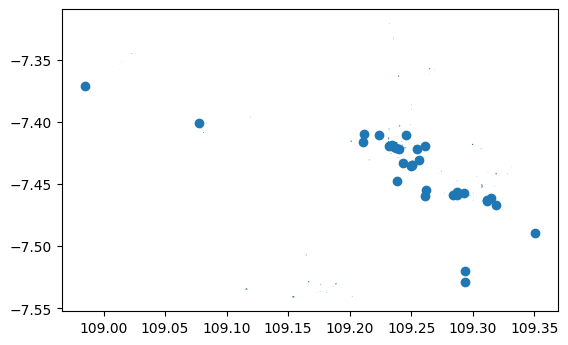

In [ ]:
#plot data
sekolah.plot()

In [ ]:
#mendapatkan semua building footprints
#contoh
place = "Banyumas, Central Java, Indonesia"
tags = {"building": True} # true = menghasilkan seasama object building
building = ox.features_from_place(place, tags)
building.shape

(481814, 108)

In [ ]:
building.head()

geometry  \
element id                                       
node    1448608332  POINT (109.23622 -7.42534)   
        1887657631  POINT (109.29846 -7.45788)   
        2006020429  POINT (109.24238 -7.42907)   
        2047440108  POINT (109.01757 -7.34923)   
        2817178267  POINT (109.28721 -7.45572)   

                                       addr:housename addr:housenumber  \
element id                                                               
node    1448608332                      Wisma Merdeka               17   
        1887657631                                NaN              NaN   
        2006020429  Kantor Kelurahan Purwokerto Kulon              NaN   
        2047440108                                NaN              NaN   
        2817178267                                NaN              NaN   

                       addr:street building  \
element id                                    
node    1448608332   Jalan Merdeka      yes   
        1887657631             NaN      yes   
        2006020429  Jalan Situmpur   public   
        2047440108             NaN   mosque   
        2817178267             NaN   office   

                                                 name addr:city  \
element id                                                        
node    1448608332                    Gedhe Institute       NaN   
        1887657631      Klenteng Hok Tek Bio Sokaraja  Sokaraja   
        2006020429    Purwokerto Kulon Community Hall       NaN   
        2047440108                      Masjid Bribis       NaN   
        2817178267  Kantor Kepala Desa Sokaraja Kulon       NaN   

                             amenity  religion  \
element id                                       
node    1448608332               NaN       NaN   
        1887657631  place_of_worship  buddhist   
        2006020429               NaN       NaN   
        2047440108  place_of_worship    muslim   
        2817178267               NaN       NaN   

                                          designation  ...  \
element id                                             ...   
node    1448608332                                NaN  ...   
        1887657631                                NaN  ...   
        2006020429  Kantor Kelurahan Purwokerto Kulon  ...   
        2047440108                                NaN  ...   
        2817178267                                NaN  ...   

                   internet_access:fee shelter_type contact:facebook delivery  \
element id                                                                      
node    1448608332                 NaN          NaN              NaN      NaN   
        1887657631                 NaN          NaN              NaN      NaN   
        2006020429                 NaN          NaN              NaN      NaN   
        2047440108                 NaN          NaN              NaN      NaN   
        2817178267                 NaN          NaN              NaN      NaN   

                   diet:healthy image mobile payment:cash payment:contactless  \
element id                                                                      
node    1448608332          NaN   NaN    NaN          NaN                 NaN   
        1887657631          NaN   NaN    NaN          NaN                 NaN   
        2006020429          NaN   NaN    NaN          NaN                 NaN   
        2047440108          NaN   NaN    NaN          NaN                 NaN   
        2817178267          NaN   NaN    NaN          NaN                 NaN   

                   type  
element id               
node    1448608332  NaN  
        1887657631  NaN  
        2006020429  NaN  
        2047440108  NaN  
        2817178267  NaN  

[5 rows x 108 columns]

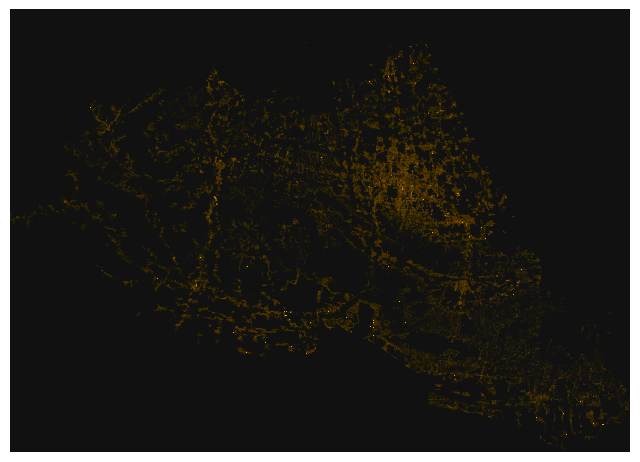

In [ ]:
fig, ax = ox.plot_footprints(building, figsize=(8,8))

In [ ]:
place= "Banyumas, Central Java, Indonesia"
tag_building = {"building": "mosque"} #key building
building = ox.features_from_place(place, tag_building)
building.shape

(24, 17)

In [ ]:
building.head()

geometry  \
element id                                                              
node    2047440108                         POINT (109.01757 -7.34923)   
way     193845415   POLYGON ((109.22946 -7.42455, 109.22952 -7.424...   
        195980358   POLYGON ((109.07967 -7.40833, 109.07963 -7.408...   
        197728589   POLYGON ((109.01224 -7.35186, 109.01238 -7.351...   
        197728590   POLYGON ((109.01576 -7.34988, 109.01584 -7.349...   

                             amenity building denomination  \
element id                                                   
node    2047440108  place_of_worship   mosque        sunni   
way     193845415   place_of_worship   mosque        sunni   
        195980358   place_of_worship   mosque          NaN   
        197728589   place_of_worship   mosque        sunni   
        197728590   place_of_worship   mosque        sunni   

                                   name opening_hours religion   addr:city  \
element id                                                                   
node    2047440108        Masjid Bribis          24/7   muslim         NaN   
way     193845415    Masjid Baitussalam           NaN   muslim  Purwokerto   
        195980358      Masjid Ajibarang           NaN   muslim         NaN   
        197728589     Masjid Al Mutaqin           NaN   muslim         NaN   
        197728590   Masjid Karang Anyar           NaN   muslim         NaN   

                   addr:street access:roof addr:full building:levels  \
element id                                                             
node    2047440108         NaN         NaN       NaN             NaN   
way     193845415          NaN         NaN       NaN             NaN   
        195980358          NaN         NaN       NaN             NaN   
        197728589          NaN         NaN       NaN             NaN   
        197728590          NaN         NaN       NaN             NaN   

                   building:roof building:structure building:walls  \
element id                                                           
node    2047440108           NaN                NaN            NaN   
way     193845415            NaN                NaN            NaN   
        195980358            NaN                NaN            NaN   
        197728589            NaN                NaN            NaN   
        197728590            NaN                NaN            NaN   

                   capacity:persons service_times  
element id                                         
node    2047440108              NaN           NaN  
way     193845415               NaN           NaN  
        195980358               NaN           NaN  
        197728589               NaN           NaN  
        197728590               NaN           NaN

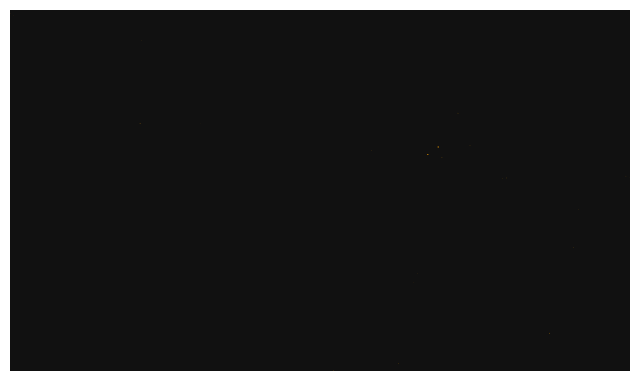

In [ ]:
fig, ax = ox.plot_footprints(building, figsize=(8, 8))

In [ ]:
Place = "Banyumas, Central Java, Indonesia"
tag_building = {"building": "mosque"} # key building
building = ox.features_from_place(place, tag_building)
building.shape

(24, 17)

In [ ]:
north, south, east, west = -7.246292, -7.663945, 109.445834, 108.891311

building_bbox = ox.features.features_from_bbox((west, south, east, north), tags={'building': True})

print(building_bbox.shape)

(822757, 142)


In [ ]:
building_bbox.head()

geometry building           amenity  \
element id                                                                  
node    1448608332  POINT (109.23622 -7.42534)      yes               NaN   
        1887657631  POINT (109.29846 -7.45788)      yes  place_of_worship   
        2006020429  POINT (109.24238 -7.42907)   public               NaN   
        2047440108  POINT (109.01757 -7.34923)   mosque  place_of_worship   
        2817178267  POINT (109.28721 -7.45572)   office               NaN   

                   denomination                               name  \
element id                                                           
node    1448608332          NaN                    Gedhe Institute   
        1887657631          NaN      Klenteng Hok Tek Bio Sokaraja   
        2006020429          NaN    Purwokerto Kulon Community Hall   
        2047440108        sunni                      Masjid Bribis   
        2817178267          NaN  Kantor Kepala Desa Sokaraja Kulon   

                   opening_hours  religion                     addr:housename  \
element id                                                                      
node    1448608332           NaN       NaN                      Wisma Merdeka   
        1887657631           NaN  buddhist                                NaN   
        2006020429           NaN       NaN  Kantor Kelurahan Purwokerto Kulon   
        2047440108          24/7    muslim                                NaN   
        2817178267           NaN       NaN                                NaN   

                   addr:housenumber     addr:street  ...  \
element id                                           ...   
node    1448608332               17   Jalan Merdeka  ...   
        1887657631              NaN             NaN  ...   
        2006020429              NaN  Jalan Situmpur  ...   
        2047440108              NaN             NaN  ...   
        2817178267              NaN             NaN  ...   

                   healthcare:speciality note level police:type_idn architect  \
element id                                                                      
node    1448608332                   NaN  NaN   NaN             NaN       NaN   
        1887657631                   NaN  NaN   NaN             NaN       NaN   
        2006020429                   NaN  NaN   NaN             NaN       NaN   
        2047440108                   NaN  NaN   NaN             NaN       NaN   
        2817178267                   NaN  NaN   NaN             NaN       NaN   

                   grades outdoor_seating industrial house type  
element id                                                       
node    1448608332    NaN             NaN        NaN   NaN  NaN  
        1887657631    NaN             NaN        NaN   NaN  NaN  
        2006020429    NaN             NaN        NaN   NaN  NaN  
        2047440108    NaN             NaN        NaN   NaN  NaN  
        2817178267    NaN             NaN        NaN   NaN  NaN  

[5 rows x 142 columns]

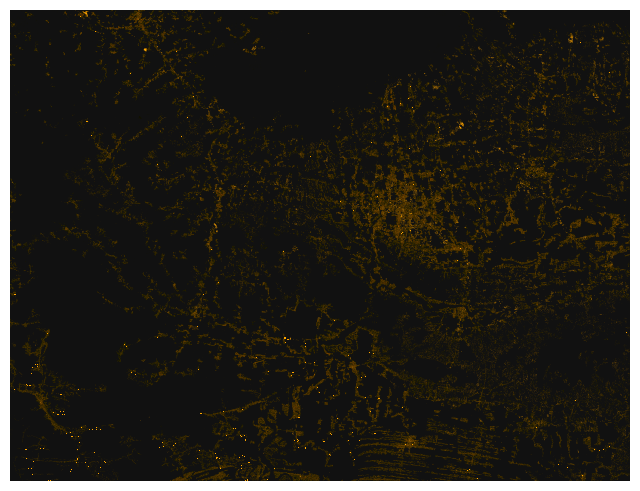

In [ ]:
fig, ax = ox.plot_footprints(building_bbox, figsize=(8,8))

In [ ]:
!pip install contextily
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 34.3 MB/s eta 0:00:00


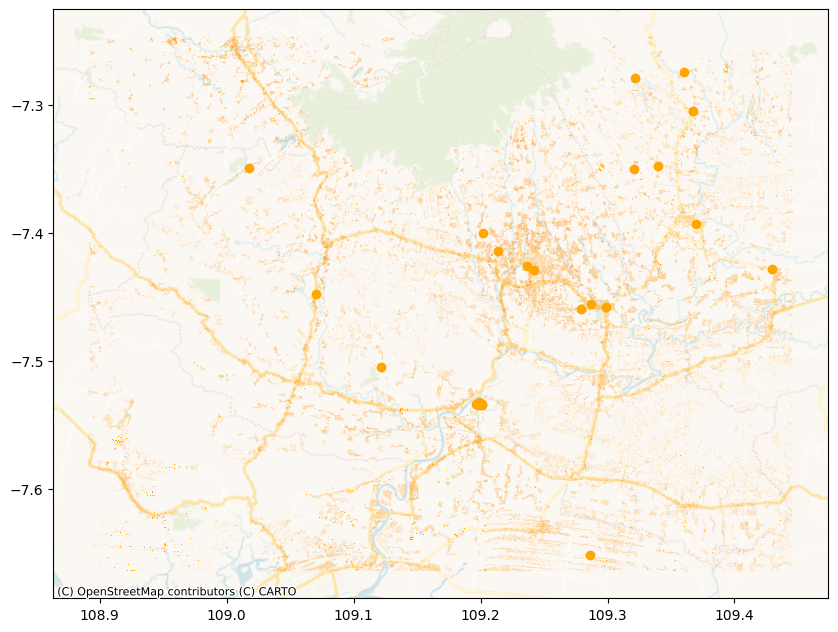

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 8))

building_bbox.plot(ax=ax, color='orange')


cx.add_basemap(
    ax,
    crs="EPSG:4326",
    source=cx.providers.CartoDB.VoyagerNoLabels
)

plt.show()

In [ ]:
#TUGAS Pra Penugasan BF
#2211102283/IKBAR KAZFI AZHARI
import folium
import pandas as pd
from geopy.distance import geodesic
from itertools import combinations


# Koordinat 10 tempat di Banyumas
locations = {
    "Alun-Alun Purwokerto": (-7.421, 109.234),
    "Universitas Jenderal Soedirman (Unsoed)": (-7.425, 109.244),
    "Stasiun Purwokerto": (-7.421, 109.244),
    "GOR Satria Purwokerto": (-7.421, 109.242),
    "Baturaden": (-7.325, 109.232),
    "Museum BRI": (-7.421, 109.236),
    "Pasar Wage Purwokerto": (-7.423, 109.240),
    "Curug Cipendok": (-7.322, 109.196),
    "RSUD Prof. Dr. Margono": (-7.426, 109.249),
    "Masjid Agung Baitussalam": (-7.420, 109.235)
}

# Buat peta dengan pusat di Banyumas
Peta = folium.Map(location=[-7.421, 109.234], zoom_start=13)

# Tambahkan marker dengan label nama tempat
for name, coord in locations.items():
    folium.Marker(
        coord,
        popup=folium.Popup(name, parse_html=True),  # Muncul saat diklik
        icon=folium.Icon(color="blue"),
        tooltip=name  # Muncul saat hover
    ).add_to(Peta)

# Tambahkan garis dan tampilkan jarak antar titik
for (name1, coord1), (name2, coord2) in combinations(locations.items(), 2):
    distance = geodesic(coord1, coord2).km  # Hitung jarak dalam km
    folium.PolyLine([coord1, coord2], color="red").add_to(Peta)
    midpoint = [(coord1[0] + coord2[0]) / 2, (coord1[1] + coord2[1]) / 2]
    folium.Marker(
        midpoint,
        icon=folium.DivIcon(html=f'<div style="font-size:8pt; color:red;">{distance:.1f} km</div>')
    ).add_to(Peta)

# Tampilkan peta
Peta



In [ ]:
import folium
from geopy.distance import geodesic
from itertools import combinations
import pandas as pd

# Koordinat 10 tempat di Banyumas
locations = {
    "Alun-Alun Purwokerto": (-7.421, 109.234),
    "Universitas Jenderal Soedirman (Unsoed)": (-7.425, 109.244),
    "Stasiun Purwokerto": (-7.421, 109.244),
    "GOR Satria Purwokerto": (-7.421, 109.242),
    "Baturaden": (-7.325, 109.232),
    "Museum BRI": (-7.421, 109.236),
    "Pasar Wage Purwokerto": (-7.423, 109.240),
    "Curug Cipendok": (-7.322, 109.196),
    "RSUD Prof. Dr. Margono": (-7.426, 109.249),
    "Masjid Agung Baitussalam": (-7.420, 109.235)
}

# Buat peta dengan pusat di Banyumas
Peta = folium.Map(location=[-7.421, 109.234], zoom_start=13)

# Tambahkan marker dengan label nama tempat
for name, coord in locations.items():
    folium.Marker(
        coord,
        popup=folium.Popup(name, parse_html=True),  # Muncul saat diklik
        icon=folium.Icon(color="blue"),
        tooltip=name  # Muncul saat hover
    ).add_to(Peta)

# Tambahkan garis dengan popup jarak saat diklik
for (name1, coord1), (name2, coord2) in combinations(locations.items(), 2):
    distance = geodesic(coord1, coord2).km  # Hitung jarak dalam km
    folium.PolyLine(
        [coord1, coord2],
        color="red",
        weight=2,
        popup=folium.Popup(f"Jarak: {distance:.2f} km", parse_html=True)  # Jarak muncul saat diklik
    ).add_to(Peta)

# Tampilkan peta
Peta

